# Classification Example with scikit-learn

Adapted from the official scikit-learn documentation.

In [45]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [29]:
digits = datasets.load_digits()

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the ```.data member```, which is a ```n_samples```, ```n_features array```. In the case of supervised problems, one or more response variables are stored in the ```.target``` member. M

In [5]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


and ```digits.target``` gives the ground truth for the digit dataset, that is the number corresponding to each digit image that we are trying to learn:

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

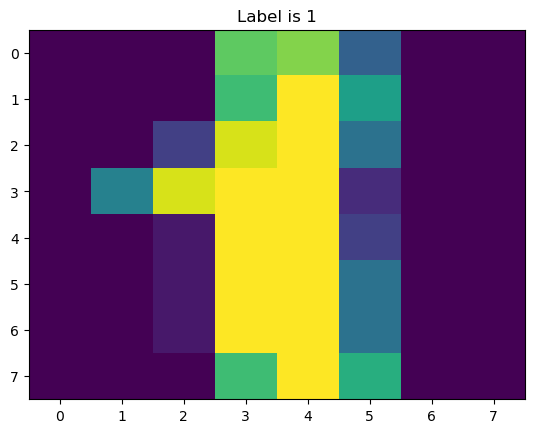

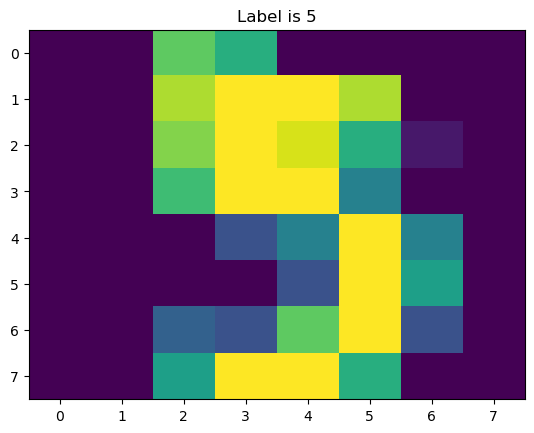

In [43]:
plt.imshow(digits.data[1].reshape(8,8),aspect = 'auto')
plt.title('Label is '+ str(digits.target[1]))
plt.show()
plt.title('Label is '+ str(digits.target[5]))
plt.imshow(digits.data[5].reshape(8,8),aspect = 'auto')
plt.show()

## Dataset splitting (hold-out approach)

In [52]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
# This is an example of the hold-out approach for
# model validation.
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)


## Let us predict something

An example of an estimator is the class ```sklearn.svm.SVC```, which implements support vector classification. The estimator’s constructor takes as arguments the model’s parameters.

In [48]:
clf = svm.SVC(gamma=0.001, C=100.)

In this example, we set the value of ```gamma manually```. To find good values for these parameters, we can use tools such as grid search and cross validation.

The ```clf``` (for classifier) estimator instance is first fitted to the model; that is, it must learn from the model. This is done by passing our training set to the ```fit``` method. For the training set, we’ll use all the images from our dataset, except for the last image, which we’ll reserve for our predicting. We select the training set with the ```[:-1]``` Python syntax, which produces a new array that contains all but the last item from digits.data:

In [53]:
clf.fit(X_train, y_train)

SVC(C=100.0, gamma=0.001)

Now you can predict new values. In this case, you’ll predict using the last image from ```digits.data```. By predicting, you’ll determine the image from the training set that best matches the last image.

In [59]:
clf.predict(X_test[4:5])

array([0])

let us plot the image and see if we agree with the classifier.

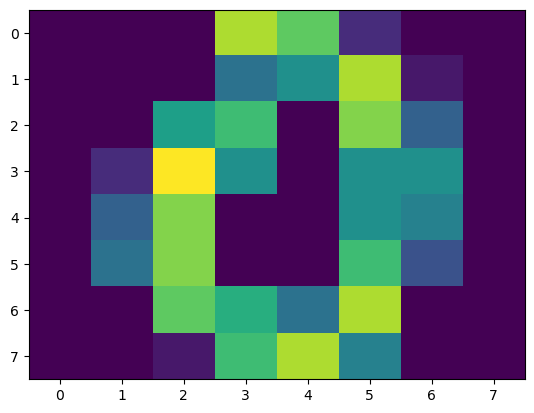

In [60]:
plt.imshow(X_test[4:5].reshape(8,8), aspect = 'auto')

## Let us check some metrics

In [61]:
preds = clf.predict(X_test)

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 87  1  0  0  0  0  0  2  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 82  0  3  0  2  4  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


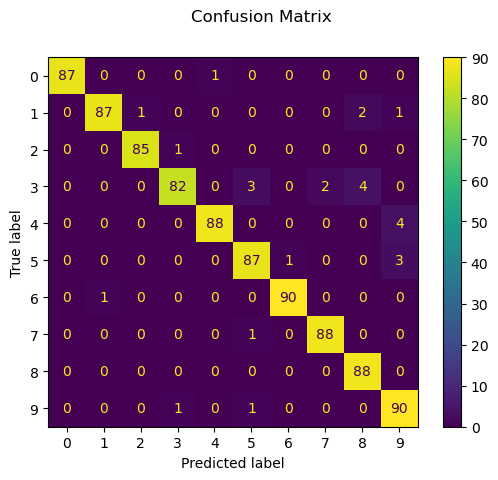

In [64]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [66]:
metrics.accuracy_score(y_test, preds)

0.9699666295884316